In [0]:
%run "../includes/configuration"

In [0]:
SELECT * FROM f1_presentation.calculated_race_results limit(10)

race_year,constructs_name,drivers_name,position,points,calculated_points
2008,McLaren,Lewis Hamilton,1,10.0,10
2008,BMW Sauber,Nick Heidfeld,2,8.0,9
2008,Williams,Nico Rosberg,3,6.0,8
2008,Renault,Fernando Alonso,4,5.0,7
2008,McLaren,Heikki Kovalainen,5,4.0,6
2008,Williams,Kazuki Nakajima,6,3.0,5
2008,Toro Rosso,Sébastien Bourdais,7,2.0,4
2008,Ferrari,Kimi Räikkönen,8,1.0,3
2008,BMW Sauber,Robert Kubica,null,0.0,null
2008,Toyota,Timo Glock,null,0.0,null


In [0]:
CREATE OR REPLACE TEMP VIEW v_dominant_drivers 
AS
SELECT drivers_name, 
count(1) as total_races, 
SUM(calculated_points) as total_points,
AVG(calculated_points) as avg_points,
RANK() OVER (ORDER BY AVG(calculated_points) DESC) as driver_rank
FROM f1_presentation.calculated_race_results
GROUP BY drivers_name
HAVING count(1) >= 60
ORDER BY avg_points DESC


In [0]:

SELECT race_year,
drivers_name, 
count(1) as total_races, 
SUM(calculated_points) as total_points,
AVG(calculated_points) as avg_points,
RANK() OVER (ORDER BY AVG(calculated_points) DESC) as driver_rank
FROM f1_presentation.calculated_race_results
WHERE drivers_name in (SELECT drivers_name FROM v_dominant_drivers WHERE driver_rank <= 10)
GROUP BY race_year, drivers_name
ORDER BY race_year, avg_points DESC

race_year,drivers_name,total_races,total_points,avg_points,driver_rank
1951,Stirling Moss,1,3,3.0,111
1952,Stirling Moss,5,null,null,120
1953,Stirling Moss,4,5,1.6666666666666667,116
1954,Stirling Moss,6,9,4.5,105
1955,Stirling Moss,7,37,7.4,72
1956,Stirling Moss,9,43,8.6,34
1957,Stirling Moss,7,39,7.8,62
1958,Stirling Moss,10,49,9.8,2
1959,Stirling Moss,8,29,9.666666666666666,5
1960,Stirling Moss,7,35,8.75,28


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

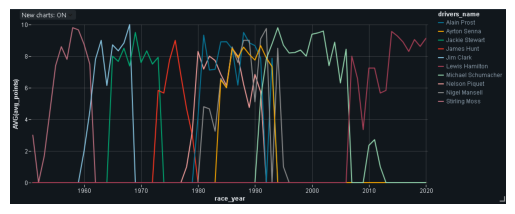

In [0]:
%python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = f"/dbfs{images_folder_path}/image1.png"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

